In [65]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep 27 13:32:37 2022

@author: waleed.al.haidri
"""
# моделирование дисрктизации & квантования
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, pi, arange
# =============================================================================
# Раздел дисрктизации
# =============================================================================
def sampling_sim(f, fs, duration=1, ph=0, stm= True):
    #график дискретизации
    a = 1 # Amplitude
    sec = duration

    for fi in fs:
        T = 1/fi # sample time
        T1=T/100
        t = arange(0,sec+T,T) # time
        t1 = arange(0,sec+T1,T1) # time
        y = a * sin(2*pi*f*t + ph)
        y1 = a * sin(2*pi*f*t1)  
        D = sec*fi*24
        if stm:
          plt.stem(t,y,'r', use_line_collection=True)
          plt.plot(t,y,'b')
        else:
          plt.plot(t,y,'b')
        plt.plot(t1,y1, 'g')
        plt.xlabel('time, sec')
        plt.ylabel('amplitude, V')
        plt.title(f'Fs = {str(fi)}Hz = {round(fi /f)}F. File size:{D}B')
        plt.grid()
        plt.show()

def fileSize_counter(f, fs, adc = 24, duration=1):
    #график дискретизации
    sec = duration
    adc_resolution = adc

    for fi in fs:
        D = round(sec*fi*adc_resolution/10**6, 3)
        print(f'Fs = {str(fi)}Hz = {fi /f}F. File size:{D}mB')
        

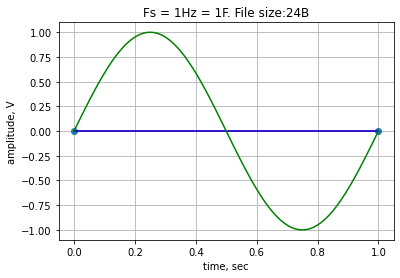

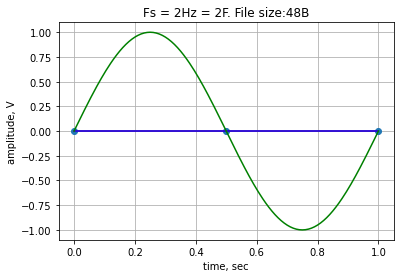

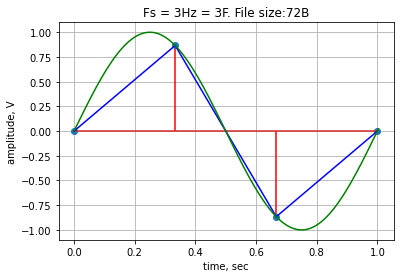

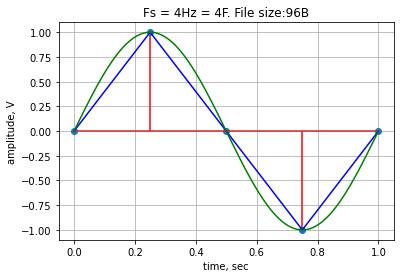

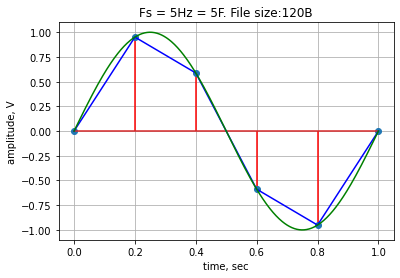

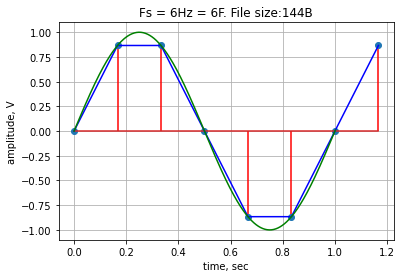

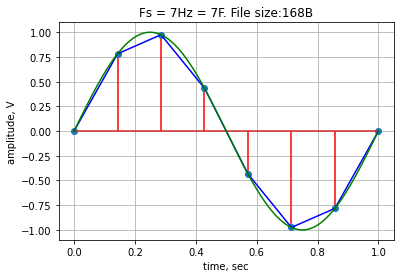

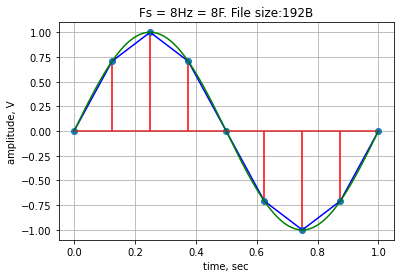

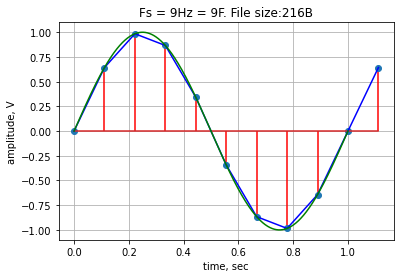

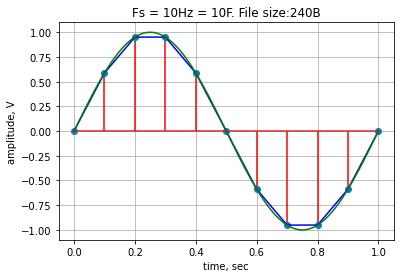

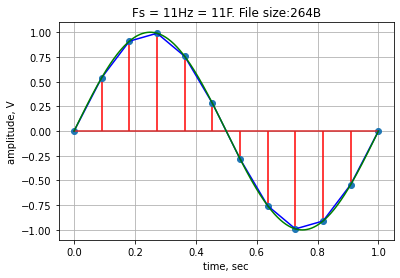

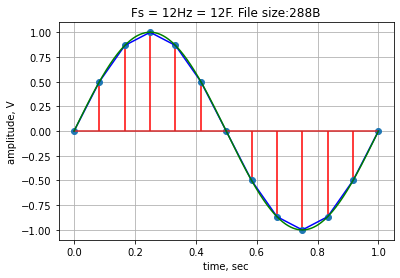

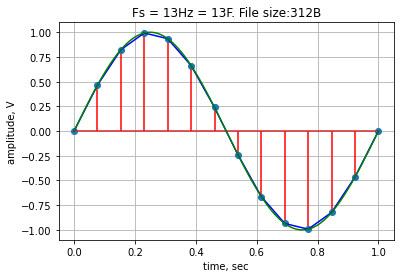

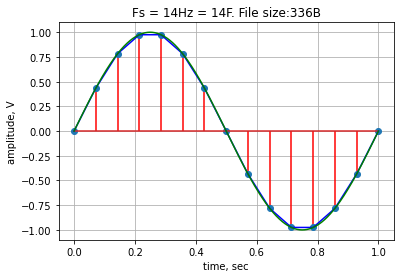

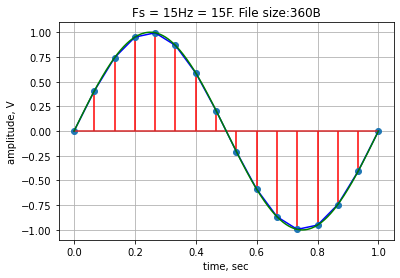

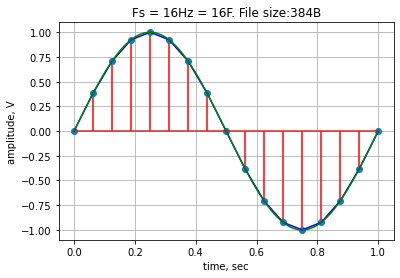

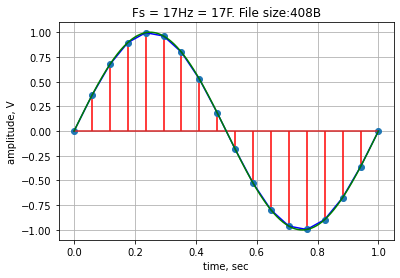

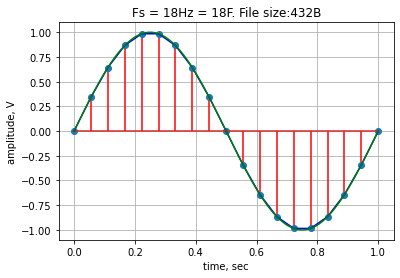

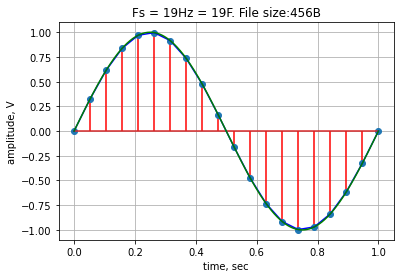

In [66]:
#Понимание дискретизации
f = 1 # main frequency
fs = arange(f, 20*f)  # sample rate
sampling_sim(f, fs,  ph = 0)

In [68]:
#Влияние частоты дискретизации на размер файла
f = 100 # max frequency
time = 60 # sec
fs = arange(f, 10*f,f)  # sample rate
print(fileSize_counter(f, fs, adc = 16, duration=time))

Fs = 100Hz = 1.0F. File size:0.096mB
Fs = 200Hz = 2.0F. File size:0.192mB
Fs = 300Hz = 3.0F. File size:0.288mB
Fs = 400Hz = 4.0F. File size:0.384mB
Fs = 500Hz = 5.0F. File size:0.48mB
Fs = 600Hz = 6.0F. File size:0.576mB
Fs = 700Hz = 7.0F. File size:0.672mB
Fs = 800Hz = 8.0F. File size:0.768mB
Fs = 900Hz = 9.0F. File size:0.864mB
None


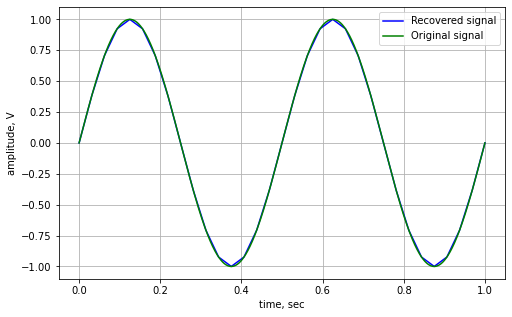

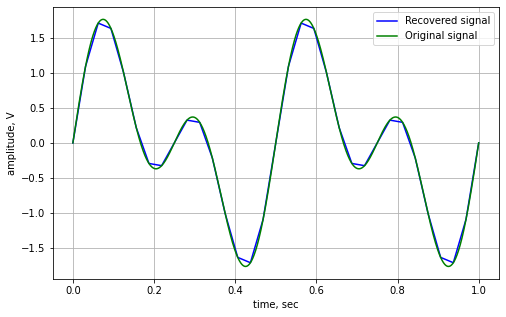

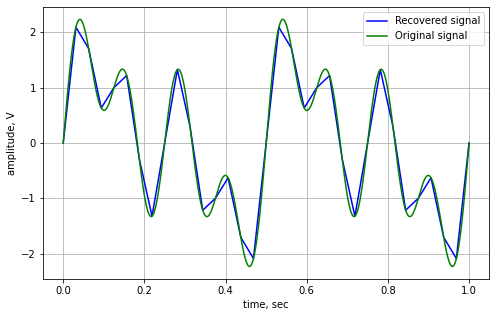

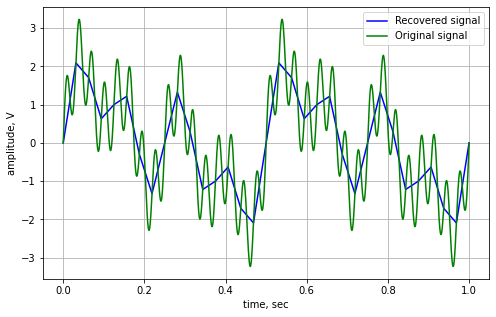

In [70]:
# aliazing
def aliazing_sim(f, fs, ph=0):
    #график дискретизации
    a = 1 # Amplitude
    sec = 1 # duration
    y = 0
    y1 = 0

    for freq in f:
        T = 1/fs # sample time
        T1=T/100
        t = arange(0,sec+T,T) # time
        t1 = arange(0,sec+T1,T1) # time
        y += a * sin(2*pi*freq*t + ph)
        y1 += a * sin(2*pi*freq*t1)  
        plt.figure(figsize=[8,5])
        plt.plot(t,y,'b', label='Recovered signal')
        plt.plot(t1,y1, 'g', label='Original signal')
        plt.legend()
        plt.xlabel('time, sec')
        plt.ylabel('amplitude, V')
        plt.grid()
        plt.show()



fs = 32 # sample rate  
f = [2, 4, 8, 32]  # frequency

aliazing_sim(f, fs,  ph = 0)


50.0


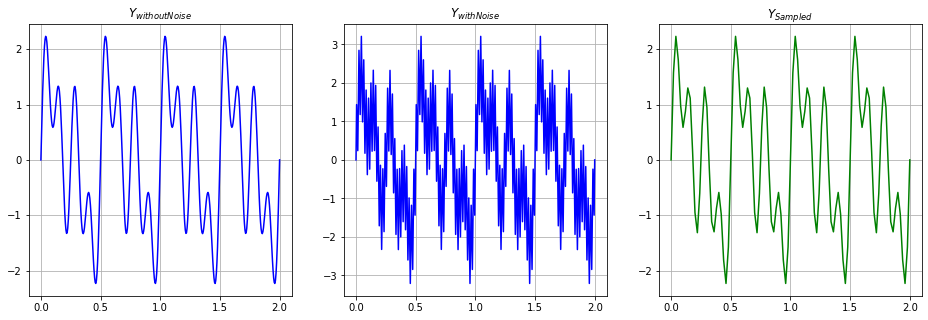

In [71]:
 # Роль фильтрации перед дискретизацией
a = 1 # Amplitude
sec = 2 # duration
y = 0
y1 = 0
fs = 200
T = 1/fs # sample time
f_noise = 50
f_original = [2, 4, 8]
# figure
plt.figure(figsize=[16,5])
for freq in f_original:  
    t = arange(0,sec+T,T) # time
    y += a * sin(2*pi*freq*t)

plt.subplot(1,3,1)
plt.plot(t,y,'b')
plt.title('$Y_{withoutNoise}$')
plt.grid()

# adding noise
y = y + a * sin(2*pi*f_noise*t)
plt.subplot(1,3,2)
plt.plot(t,y,'b')
plt.title('$Y_{withNoise}$')
plt.grid()

#========
f_new = np.zeros((len(f_original)+1))
f_new [:-1] = f_original
f_new [-1] = f_noise

fs1 = f_new[-1]
print(fs1)
T1 = 1/fs1
for freq in f_new:
    t1 = arange(0,sec+T1,T1) # time
    y1 += a * sin(2*pi*freq*t1)  

plt.subplot(1,3,3)
plt.plot(t1,y1, 'g')
plt.title('$Y_{Sampled}$')
plt.grid()
plt.show()
